# Churn Rate 2: Bootstrap

We are working in Online Learning platform and working on developing Churn Rate prediction model. We want to know which user have higher probability to leave our platform: starts to visit the website rarely, or he/she does not know about all programs available.

We carefully study what problems our users have. We make interviews with users asking what they like in the platform and what can be added or fixed.

In the Churn Rate part 1 task we completed data aquisition, features engineering and model development

In this task we will do advanced validation of the model and metrics calculations.

# Boostrapped ROC-AUC

When we developed good (as we think) model - for example with ROC-AUC = 93%  
We should also think: How we are sure in our evaluation?  
How we can know that in nex month, when we again calculate metric, ROC-AUC will be 95% and not 76%?  
We really want to know what to expect from the model.  

Obviously model performance will fluctuate, but in what extend?

To answer this question, we need to calculate lower and upper boundaries of the **Confidence Interval**

![](./pic/1.png)

Every metric (and ROC-AUC is not an exclusion) - is a statistics, which depends on dataset on which we calculate it.  
In our task - our dataset is our users, which we include in our test dataset.  
With time our users change their behavior and therefore features are also changing.

## Confidence Intervals  
- 95% Confidence Interval - values diapason of some statistical measure in 95% of cases. Usually, centered interval is considered. Therefore, on the left side and on the right side will be 2.5% of the values which are not included in Confidence Interval.
- Confidence Bounds - bounds of confidence intervals
- LCB (Lower Confidence Bound) - lower boundary of the confidence interval
- UCB (Upper Confidence Bound) - upper boundary of the confidence interval

How we can calculate Confidence Interval for ROC-AUC?

Imagine: you remember only formulas for Normal distribution, but how we can implement them to our task?  
You start Google: "How to calculate Confidence Interval for ROC-AUC". Find some scary looking formulas and do not understand what is happening there :)  
![](./pic/2.png)

Calm down, there is one secret key, how we can start doing this task:

# Empirical distribution function:  
Our general dataset - all users in every moment in future. Ideally, we would simply generate subsets from this general dataset, calculate ROC-AUC on each of them, take Quantiles, which represent LCB and UCB.

Unfortunately, we do not have access to the general dataset.  
We have only one subset of data on which we can build only empirical distribution function.  
We can take subset and generate 10 000 speudo subsets.

# Bootstrap

This method is called "Bootstrap" - it allows us based on our subset imitate generation of other similar subsets. In suits our goal of calculating Confidence Interval for ROC-AUC metrics.

![](./pic/3.png)

we need to create python function for evaluating Confidence Interval for ROC-AUC by bootstrap.  
- inputs:
    - trained classifier (from sklearn library),
    - test subset (X, y), 
    - size of confidence interval and
    - number of boostrap subsets
- result - Confidence Interval for ROC-AUC

In [22]:
import pandas as pd

In [23]:
# function:
from typing import Tuple

import numpy as np
from sklearn.base import ClassifierMixin
from sklearn.metrics import roc_auc_score

def get_percentile_ci(bootstrap_stats, pe, alpha):
    """build percentile confidence interval"""
    left = np.quantile(bootstrap_stats, alpha/2)
    right = np.quantile(bootstrap_stats, 1 - alpha/2)
    return left, right


def roc_auc_ci(
    classifier: ClassifierMixin,
    X: np.ndarray,
    y: np.ndarray,
    conf: float = 0.95,
    n_bootstraps: int = 10_000,
) -> Tuple[float, float]:
    """Returns confidence bounds of the ROC-AUC"""
    ...

    return (lcb, ucb)


In [24]:
# read example dataset (iris dataset):
df = pd.read_csv('./data/Iris.csv')
list(df['Species'].unique())

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [25]:
def iris_classes_encoding(species):
    if species == 'Iris-setosa':
        result = 1
    elif species == 'Iris-versicolor':
        result = 2
    elif species == 'Iris-virginica':
        result = 3
    return result

df['target'] = df['Species'].apply(lambda x: iris_classes_encoding(x))

In [26]:
del df['Species'] 

In [27]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3


In [28]:
df_target = df[['target']]
df_features = df.copy()
del df_features['target']

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

from sklearn import datasets

In [79]:
dtc = DecisionTreeClassifier(criterion = 'gini', splitter='best', max_depth=5, min_samples_leaf=20, random_state=0)

In [80]:
# Prepare the data data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)
print(f'len X_train = {len(X_train)}')
print(f'len y_train = {len(y_train)}')
print(f'len X_test = {len(X_test)}')
print(f'len y_test = {len(y_test)}')

len X_train = 105
len y_train = 105
len X_test = 45
len y_test = 45


In [82]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, random_state=0)

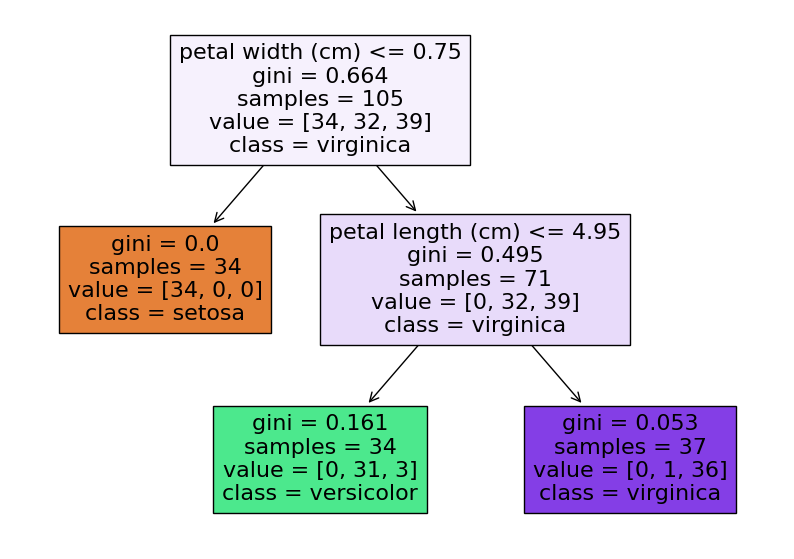

In [86]:
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(dtc, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

not bad classifier

now calculate ROC-AUC

In [87]:
from sklearn.metrics import accuracy_score

In [89]:
y_pred = dtc.predict(X_test)

In [90]:
accuracy_score(y_test, y_pred)

0.9111111111111111

In [95]:
y_true = (y_test, len(set(y_test)))
y_true

(array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
        0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
        0]),
 3)

In [96]:
y_pred = dtc.predict_proba(X_test)
y_pred

array([[0.        , 0.02702703, 0.97297297],
       [0.        , 0.91176471, 0.08823529],
       [1.        , 0.        , 0.        ],
       [0.        , 0.02702703, 0.97297297],
       [1.        , 0.        , 0.        ],
       [0.        , 0.02702703, 0.97297297],
       [1.        , 0.        , 0.        ],
       [0.        , 0.91176471, 0.08823529],
       [0.        , 0.91176471, 0.08823529],
       [0.        , 0.91176471, 0.08823529],
       [0.        , 0.02702703, 0.97297297],
       [0.        , 0.91176471, 0.08823529],
       [0.        , 0.91176471, 0.08823529],
       [0.        , 0.91176471, 0.08823529],
       [0.        , 0.91176471, 0.08823529],
       [1.        , 0.        , 0.        ],
       [0.        , 0.91176471, 0.08823529],
       [0.        , 0.91176471, 0.08823529],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.91176471, 0.08823529],
       [0.        , 0.91176471, 0.08823529],
       [1.

In [99]:
roc_auc_score(y_test, dtc.predict_proba(X_test), multi_class='ovr')

0.9487430587648452

In [101]:
roc_auc_score(y, dtc.predict_proba(X), multi_class='ovr')

0.9733333333333333

In [ ]:
# size of the initial subset: